In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
read_file = pd.read_csv('/home/srujan/Downloads/world-development-indicators/Indicators.csv')

In [3]:
read_file.head(15)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [14]:
country = read_file['CountryName'].str.contains('India')
indicator = read_file['IndicatorName'].str.contains('CO2 emissions \(metric')
#read_file[country].head()
display = read_file[country & indicator]
display.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292
64049,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.306519
92493,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.322533
121290,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.308900


In [15]:
years = display['Year'].values

In [16]:
co2_values = display['Value'].values

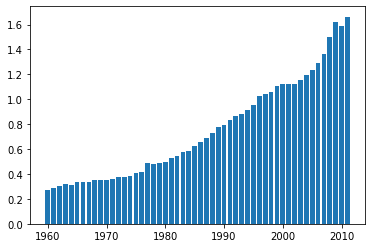

In [17]:
plt.bar(years, co2_values)
plt.show()

In [18]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
#lower = display['Value'].mean() - display['Value'].std()
#upper = display['Value'].mean() + display['Value'].std()
#hist_data = [x for x in display[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = display['Value'].values

In [19]:
print(len(hist_data))

52


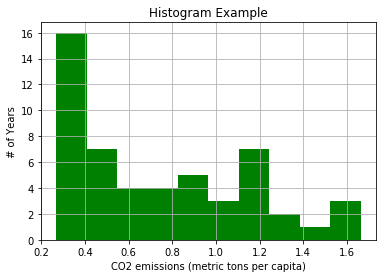

In [21]:
plt.hist(hist_data, density=False, color='green')
plt.xlabel(display['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

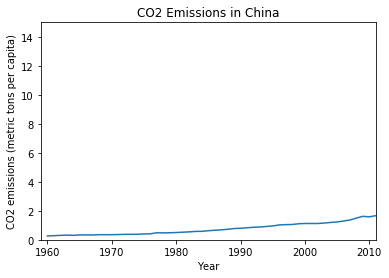

In [22]:
# switch to a line plot
plt.plot(display['Year'].values, display['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(display['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in China')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,15])

plt.show()

# compairing with other countries

In [23]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

m1 = read_file['IndicatorName'].str.contains(hist_indicator)
m2 = read_file['Year'].isin([hist_year])

co2 = read_file[m1 & m2]
co2.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [24]:
print(len(co2))

232


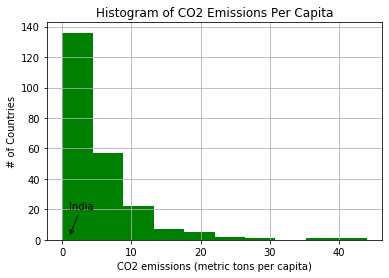

In [32]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("India",
            xy=(1, 2), xycoords='data',
            xytext=(1, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )



plt.hist(co2['Value'], 10, normed=False, facecolor='green')

plt.xlabel(display['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()